---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------

## Connected components in a spatial network
### Identifying and visualizing the parts of a network

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook is a walk-through for:**

1. Instantiating a simple network with `libpysal.cg.Chain` objects
2. Working with the network components and isolated rings
3. Visualizing the components and (non)articulation vertices
4. Longest vs. Largest components
5. Extracting network components

In [1]:
%load_ext watermark
%watermark

2020-03-28T16:17:51-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import geopandas
import libpysal
from libpysal import examples
from libpysal.cg import Point, Chain
import matplotlib
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import spaghetti

%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
geopandas           0.7.0
libpysal            4.2.2
matplotlib_scalebar 0.6.1
matplotlib          3.1.2
spaghetti           1.4.2.post2



In [3]:
try:
    from IPython.display import set_matplotlib_formats

    set_matplotlib_formats("retina")
except ImportError:
    pass

----------------

### 1. Instantiate a network from two collections of `libpysal.cg.Chain` objects

In [4]:
plus1 = [
    Chain([Point([1, 2]), Point([0, 2])]),
    Chain([Point([1, 2]), Point([1, 1])]),
    Chain([Point([1, 2]), Point([1, 3])]),
]
plus2 = [
    Chain([Point([2, 1]), Point([2, 0])]),
    Chain([Point([2, 1]), Point([3, 1])]),
    Chain([Point([2, 1]), Point([2, 2])]),
]
lines = plus1 + plus2

In [5]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


#### Here we get a warning because the network we created is not fully connected

In [6]:
ntw.network_fully_connected

False

#### It has 2 connected components

In [7]:
ntw.network_n_components

2

#### The network components can be inspected through the following attributes
##### `network_component_labels`

In [8]:
ntw.network_component_labels

array([0, 0, 0, 1, 1, 1], dtype=int32)

##### `network_component2arc` 

In [9]:
ntw.network_component2arc

{0: [(0, 1), (0, 2), (0, 3)], 1: [(4, 5), (4, 6), (4, 7)]}

##### `network_component_lengths`

In [10]:
ntw.network_component_lengths

{0: 3.0, 1: 3.0}

##### `network_longest_component`

In [11]:
ntw.network_longest_component

0

##### `network_component_vertices` 

In [12]:
ntw.network_component_vertices

{0: [0, 1, 2, 3], 1: [4, 5, 6, 7]}

##### `network_component_vertex_count` 

In [13]:
ntw.network_component_vertex_count

{0: 4, 1: 4}

##### `network_largest_component` 

In [14]:
ntw.network_largest_component

0

##### `network_component_is_ring` 

In [15]:
ntw.network_component_is_ring

{0: False, 1: False}

#### The same can be performed for graph representations, for example:
##### `graph_component_labels`

In [16]:
ntw.graph_component_labels

array([0, 0, 0, 1, 1, 1], dtype=int32)

##### `graph_component2edge` 

In [17]:
ntw.graph_component2edge

{0: [(0, 1), (0, 2), (0, 3)], 1: [(4, 5), (4, 6), (4, 7)]}

#### Extract the network arc and vertices as `geopandas.GeoDataFrame` objects

In [18]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

#### Network component labels are found in the `"comp_label"` field

In [19]:
vertices_df

id                 geometry  comp_label
0   0  POINT (1.00000 2.00000)           0
1   1  POINT (0.00000 2.00000)           0
2   2  POINT (1.00000 1.00000)           0
3   3  POINT (1.00000 3.00000)           0
4   4  POINT (2.00000 1.00000)           1
5   5  POINT (2.00000 0.00000)           1
6   6  POINT (3.00000 1.00000)           1
7   7  POINT (2.00000 2.00000)           1

In [20]:
arcs_df

id                                       geometry  comp_label
0  (0, 1)  LINESTRING (1.00000 2.00000, 0.00000 2.00000)           0
1  (0, 2)  LINESTRING (1.00000 2.00000, 1.00000 1.00000)           0
2  (0, 3)  LINESTRING (1.00000 2.00000, 1.00000 3.00000)           0
3  (4, 5)  LINESTRING (2.00000 1.00000, 2.00000 0.00000)           1
4  (4, 6)  LINESTRING (2.00000 1.00000, 3.00000 1.00000)           1
5  (4, 7)  LINESTRING (2.00000 1.00000, 2.00000 2.00000)           1

#### Plot the disconnected network and symbolize the arcs bases on the value of `"comp_label"`

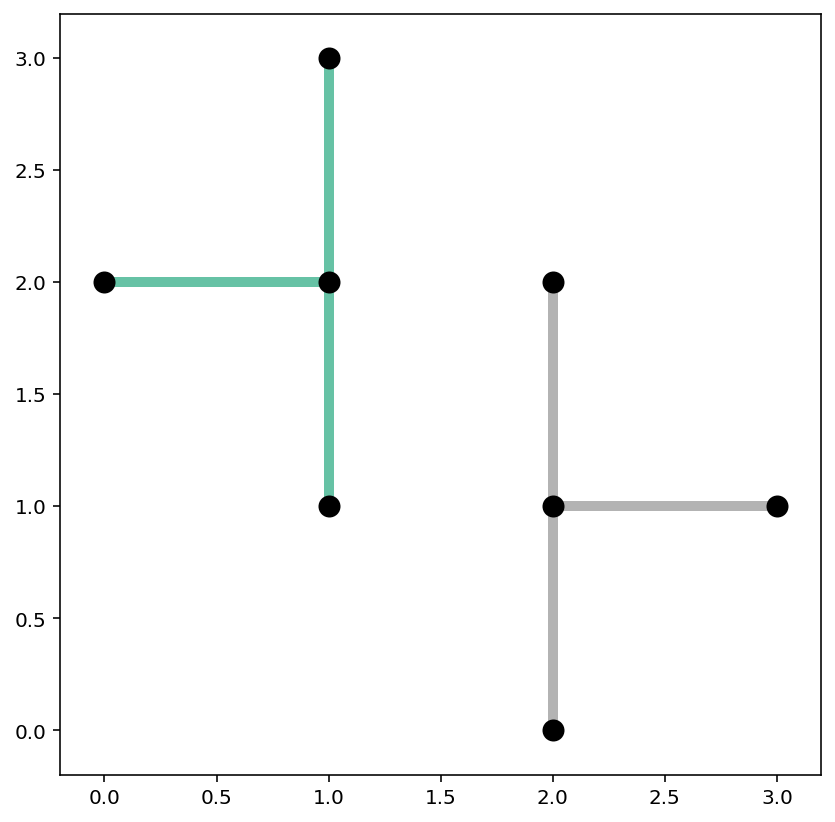

In [21]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
vertices_df.plot(ax=base, color="k", markersize=100, zorder=2);


----------------

### 2. Add to the network created above

In [22]:
new_lines = [
    Chain([Point([1, 1]), Point([2, 2])]),
    Chain([Point([0.5, 1]), Point([0.5, 0.5])]),
    Chain([Point([0.5, 0.5]), Point([1, 0.5])]),
    Chain([Point([2, 2.5]), Point([2.5, 2.5])]),
    Chain([Point([2.5, 2.5]), Point([2.5, 2])]),
]
lines += new_lines

In [23]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: (8, 10), (11, 13).
  warnings.warn(message)


#### Now there are 3 connected components in the network

In [24]:
ntw.network_n_components

3

In [25]:
ntw.network_component2arc

{0: [(0, 1), (0, 2), (0, 3), (2, 7), (4, 5), (4, 6), (4, 7)],
 1: [(8, 9), (9, 10)],
 2: [(11, 12), (12, 13)]}

In [26]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

In [27]:
arcs_df

id                                       geometry  comp_label
0     (0, 1)  LINESTRING (1.00000 2.00000, 0.00000 2.00000)           0
1     (0, 2)  LINESTRING (1.00000 2.00000, 1.00000 1.00000)           0
2     (0, 3)  LINESTRING (1.00000 2.00000, 1.00000 3.00000)           0
3     (2, 7)  LINESTRING (1.00000 1.00000, 2.00000 2.00000)           0
4     (4, 5)  LINESTRING (2.00000 1.00000, 2.00000 0.00000)           0
5     (4, 6)  LINESTRING (2.00000 1.00000, 3.00000 1.00000)           0
6     (4, 7)  LINESTRING (2.00000 1.00000, 2.00000 2.00000)           0
7     (8, 9)  LINESTRING (0.50000 1.00000, 0.50000 0.50000)           1
8    (9, 10)  LINESTRING (0.50000 0.50000, 1.00000 0.50000)           1
9   (11, 12)  LINESTRING (2.00000 2.50000, 2.50000 2.50000)           2
10  (12, 13)  LINESTRING (2.50000 2.50000, 2.50000 2.00000)           2

#### We can also inspect the non-articulation points in the network. Non-articulation points are vertices in a network that are degree-2. A vertex is degree-2 if, and only if, it is directly connected to only 2 other vertices.

In [28]:
ntw.non_articulation_points

[9, 2, 12, 7]

#### Slice out the articulation points and non-articulation points

In [29]:
napts = ntw.non_articulation_points
articulation_vertices = vertices_df[~vertices_df["id"].isin(napts)]
non_articulation_vertices = vertices_df[vertices_df["id"].isin(napts)]

#### Plot the connected components while making a distinction between articulation points and non-articulation points

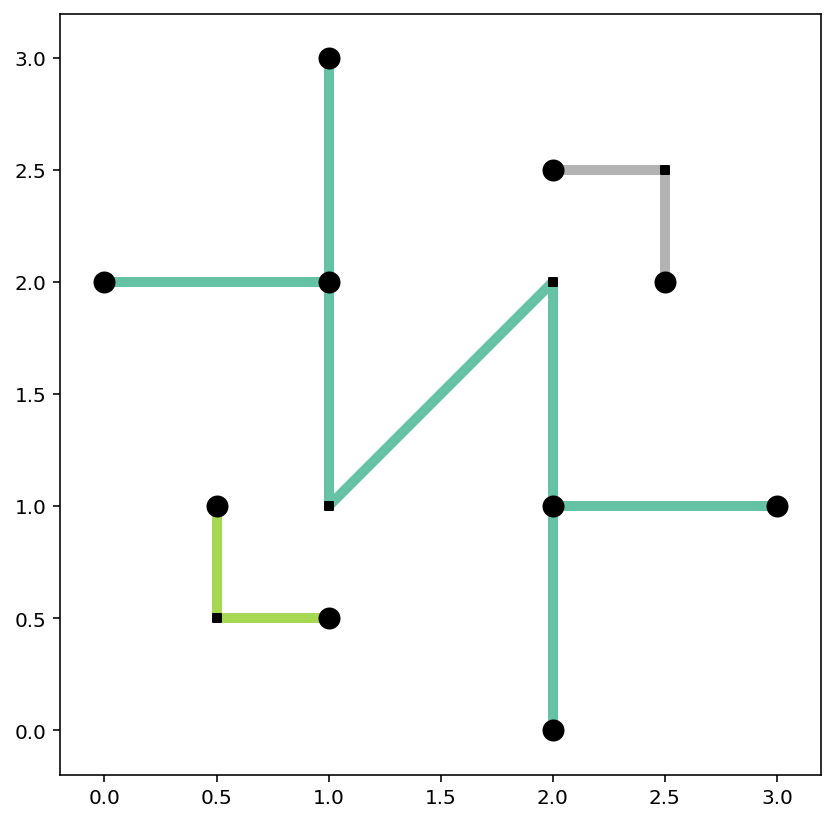

In [30]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
articulation_vertices.plot(ax=base, color="k", markersize=100, zorder=2)
non_articulation_vertices.plot(ax=base, marker="s", color="k", markersize=20, zorder=2);

----------------

### 3. Add a loop of `libpysal.cg.Chain` objects

In [31]:
new_lines = [
    Chain([Point([3, 1]), Point([3.25, 1.25])]),
    Chain([Point([3.25, 1.25]), Point([3.5, 1.25])]),
    Chain([Point([3.5, 1.25]), Point([3.75, 1])]),
    Chain([Point([3.75, 1]), Point([3.5, 0.75])]),
    Chain([Point([3.5, 0.75]), Point([3.25, 0.75])]),
    Chain([Point([3.25, 0.75]), Point([3, 1])]),
]
lines += new_lines

In [32]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: (8, 10), (11, 13).
  warnings.warn(message)


In [33]:
ntw.network_n_components

3

In [34]:
ntw.network_component2arc

{0: [(0, 1),
  (0, 2),
  (0, 3),
  (2, 7),
  (4, 5),
  (4, 6),
  (4, 7),
  (6, 14),
  (6, 18),
  (14, 15),
  (15, 16),
  (16, 17),
  (17, 18)],
 1: [(8, 9), (9, 10)],
 2: [(11, 12), (12, 13)]}

In [35]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

In [36]:
arcs_df

id                                       geometry  comp_label
0     (0, 1)  LINESTRING (1.00000 2.00000, 0.00000 2.00000)           0
1     (0, 2)  LINESTRING (1.00000 2.00000, 1.00000 1.00000)           0
2     (0, 3)  LINESTRING (1.00000 2.00000, 1.00000 3.00000)           0
3     (2, 7)  LINESTRING (1.00000 1.00000, 2.00000 2.00000)           0
4     (4, 5)  LINESTRING (2.00000 1.00000, 2.00000 0.00000)           0
5     (4, 6)  LINESTRING (2.00000 1.00000, 3.00000 1.00000)           0
6     (4, 7)  LINESTRING (2.00000 1.00000, 2.00000 2.00000)           0
7    (6, 14)  LINESTRING (3.00000 1.00000, 3.25000 1.25000)           0
8    (6, 18)  LINESTRING (3.00000 1.00000, 3.25000 0.75000)           0
9     (8, 9)  LINESTRING (0.50000 1.00000, 0.50000 0.50000)           1
10   (9, 10)  LINESTRING (0.50000 0.50000, 1.00000 0.50000)           1
11  (11, 12)  LINESTRING (2.00000 2.50000, 2.50000 2.50000)           2
12  (12, 13)  LINESTRING (2.50000 2.50000, 2.50000 2.00000)           2
13  (14, 15)  LINESTRING (3.25000 1.25000, 3.50000 1.25000)           0
14  (15, 16)  LINESTRING (3.50000 1.25000, 3.75000 1.00000)           0
15  (16, 17)  LINESTRING (3.75000 1.00000, 3.50000 0.75000)           0
16  (17, 18)  LINESTRING (3.50000 0.75000, 3.25000 0.75000)           0

#### Here we can see that all the new network vertices are non-articulation point

In [37]:
ntw.non_articulation_points

[2, 7, 9, 12, 14, 15, 16, 17, 18]

#### Slice out the articulation points and non-articulation points

In [38]:
napts = ntw.non_articulation_points
articulation_vertices = vertices_df[~vertices_df["id"].isin(napts)]
non_articulation_vertices = vertices_df[vertices_df["id"].isin(napts)]

#### The new network vertices are non-articulation points because they form a closed ring

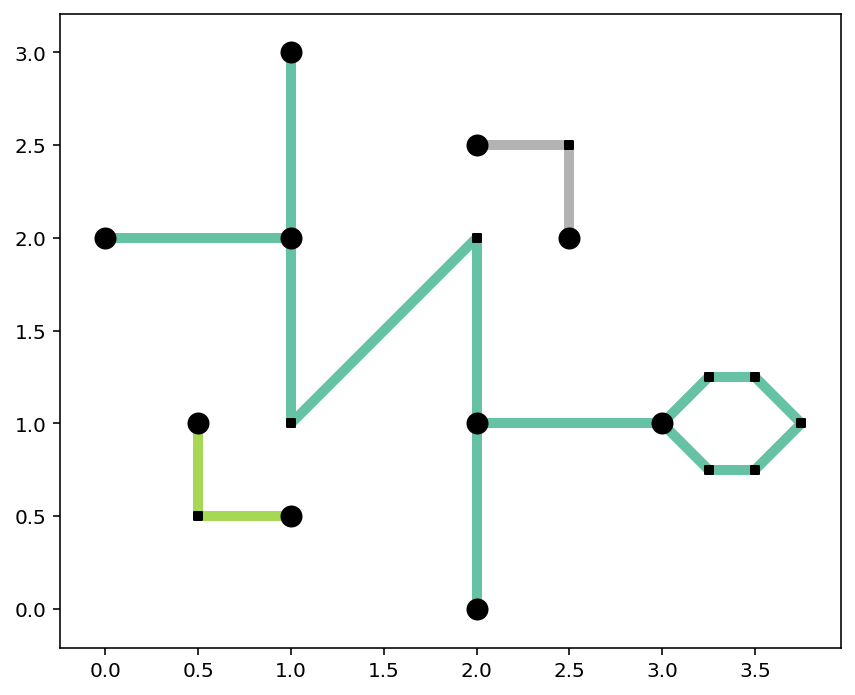

In [39]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
articulation_vertices.plot(ax=base, color="k", markersize=100, zorder=2)
non_articulation_vertices.plot(ax=base, marker="s", color="k", markersize=20, zorder=2);

-----------------------------------------------------

### 4. Longest vs. largest components — cross vs. hexagon

In [40]:
cross = [
    Chain([Point([0, 5]), Point([5, 5]), Point([5, 10])]),
    Chain([Point([5, 0]), Point([5, 5]), Point([10, 5])]),
]
hexagon = [
    Chain(
        [
            Point([12, 5]),
            Point([13, 6]),
            Point([14, 6]),
            Point([15, 5]),
            Point([14, 4]),
            Point([13, 4]),
            Point([12, 5]),
        ]
    ),
]
lines = cross + hexagon

In [41]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [42]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

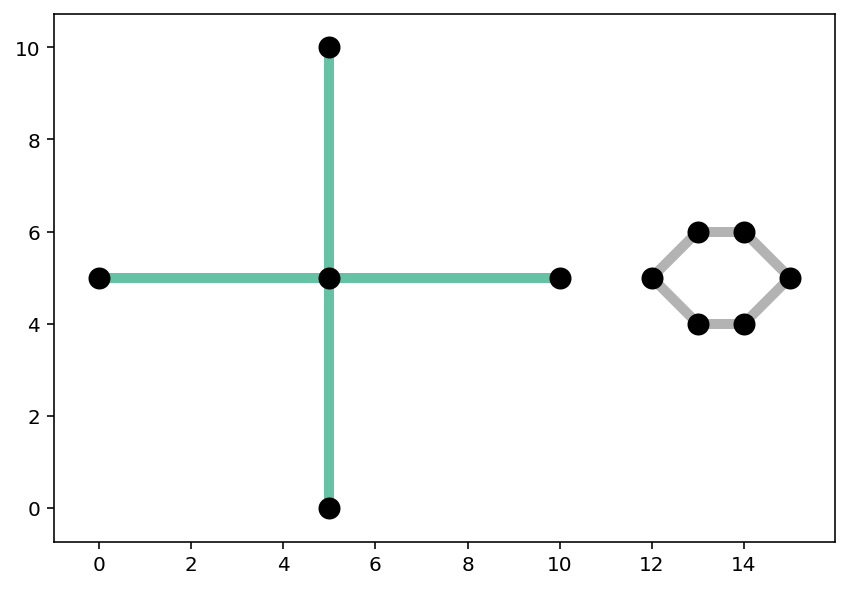

In [43]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
vertices_df.plot(ax=base, color="k", markersize=100, zorder=2);

#### The longest component is not necessarily the largest
##### This is because in `spaghetti` the largest compnent equates to the most vertices

In [44]:
clongest = ntw.network_longest_component
clength = round(ntw.network_component_lengths[clongest], 5)
clargest = ntw.network_largest_component
cverts = ntw.network_component_vertex_count[clargest]
print("The longest component is %s at %s units of distance." % (clongest, clength))
print("The largest component is %s with %s vertices." % (clargest, cverts))

The longest component is 0 at 20.0 units of distance.
The largest component is 1 with 6 vertices.


### 5. Extracting components
#### Extract the longest component

In [45]:
longest = spaghetti.extract_component(ntw, ntw.network_longest_component)

In [46]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(longest, vertices=True, arcs=True)

In [47]:
vertices_df

id                  geometry  comp_label
0   0   POINT (0.00000 5.00000)           0
1   1   POINT (5.00000 5.00000)           0
2   2  POINT (5.00000 10.00000)           0
3   3   POINT (5.00000 0.00000)           0
4   4  POINT (10.00000 5.00000)           0

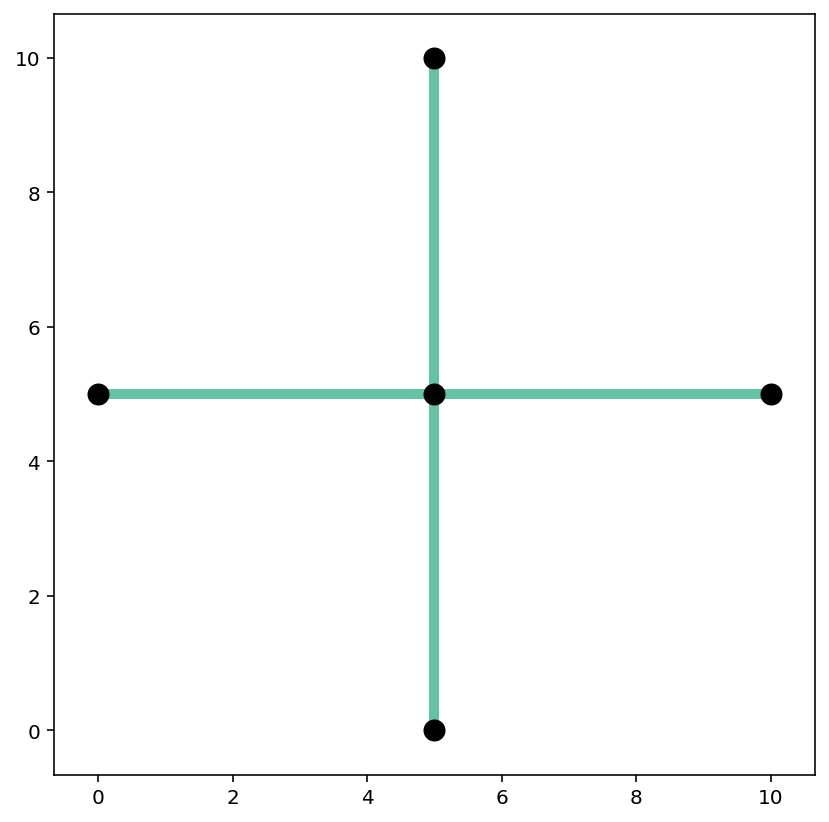

In [48]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
vertices_df.plot(ax=base, color="k", markersize=100, zorder=2);

#### Extract the largest component and plot

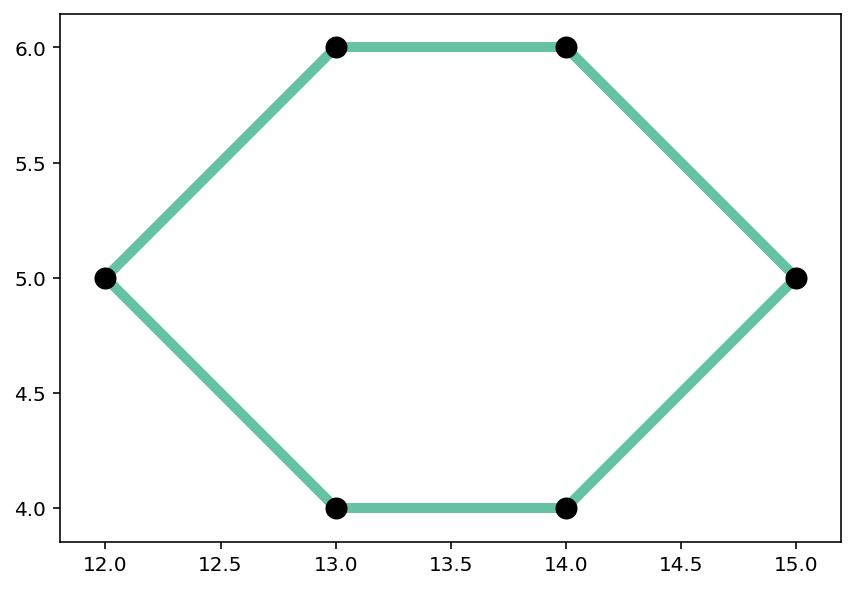

In [49]:
largest = spaghetti.extract_component(ntw, ntw.network_largest_component)
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(largest, vertices=True, arcs=True)
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
vertices_df.plot(ax=base, color="k", markersize=100, zorder=2);

#### Empirical Example — New Haven, Connecticut

In [50]:
newhaven = libpysal.examples.get_path("newhaven_nework.shp")
ntw = spaghetti.Network(in_data=newhaven, extractgraph=False)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
 There are 7 islands with ids: (1494, 1495), (2129, 2130), (3756, 3757), (8669, 8670), (9611, 9612), (11152, 11153), (11228, 11229).
  warnings.warn(message)


#### Extract the longest component

In [51]:
longest = spaghetti.extract_component(ntw, ntw.network_longest_component)

In [52]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)
arcs_df.crs = "epsg:4269"
arcs_df = arcs_df.to_crs("epsg:6433")

In [53]:
# longest vertices and arcs
lc_vertices, lc_arcs = spaghetti.element_as_gdf(longest, vertices=True, arcs=True)
lc_arcs.crs = "epsg:4269"
lc_arcs = lc_arcs.to_crs("epsg:6433")

#### Filter non-longest component arcs

In [54]:
nlc = ntw.network_longest_component
arcs_df = arcs_df[arcs_df.comp_label != nlc]
ocomp = list(set(ntw.network_component_labels))
ocomp.remove(nlc)

#### Plot network arcs

In [55]:
def legend(objects):
    """Add a legend to a plot"""
    patches = make_patches(*objects)
    kws = {"fancybox": True, "framealpha": 0.85, "fontsize": "x-large"}
    kws.update({"loc": "lower left", "labelspacing": 2.0, "borderpad": 2.0})
    legend = matplotlib.pyplot.legend(handles=patches, **kws)
    legend.get_frame().set_facecolor("white")

In [56]:
def make_patches(comp_type, in_comp, oc):
    """Create patches for legend"""
    labels_colors_alpha = [
        ["%s component: %s" % (comp_type.capitalize(), in_comp), "k", 0.5],
        ["Other components: %s-%s" % (oc[0], oc[1]), "r", 1],
    ]
    patches = []
    for l, c, a in labels_colors_alpha:
        p = matplotlib.lines.Line2D([], [], lw=2, label=l, c=c, alpha=a)
        patches.append(p)
    return patches

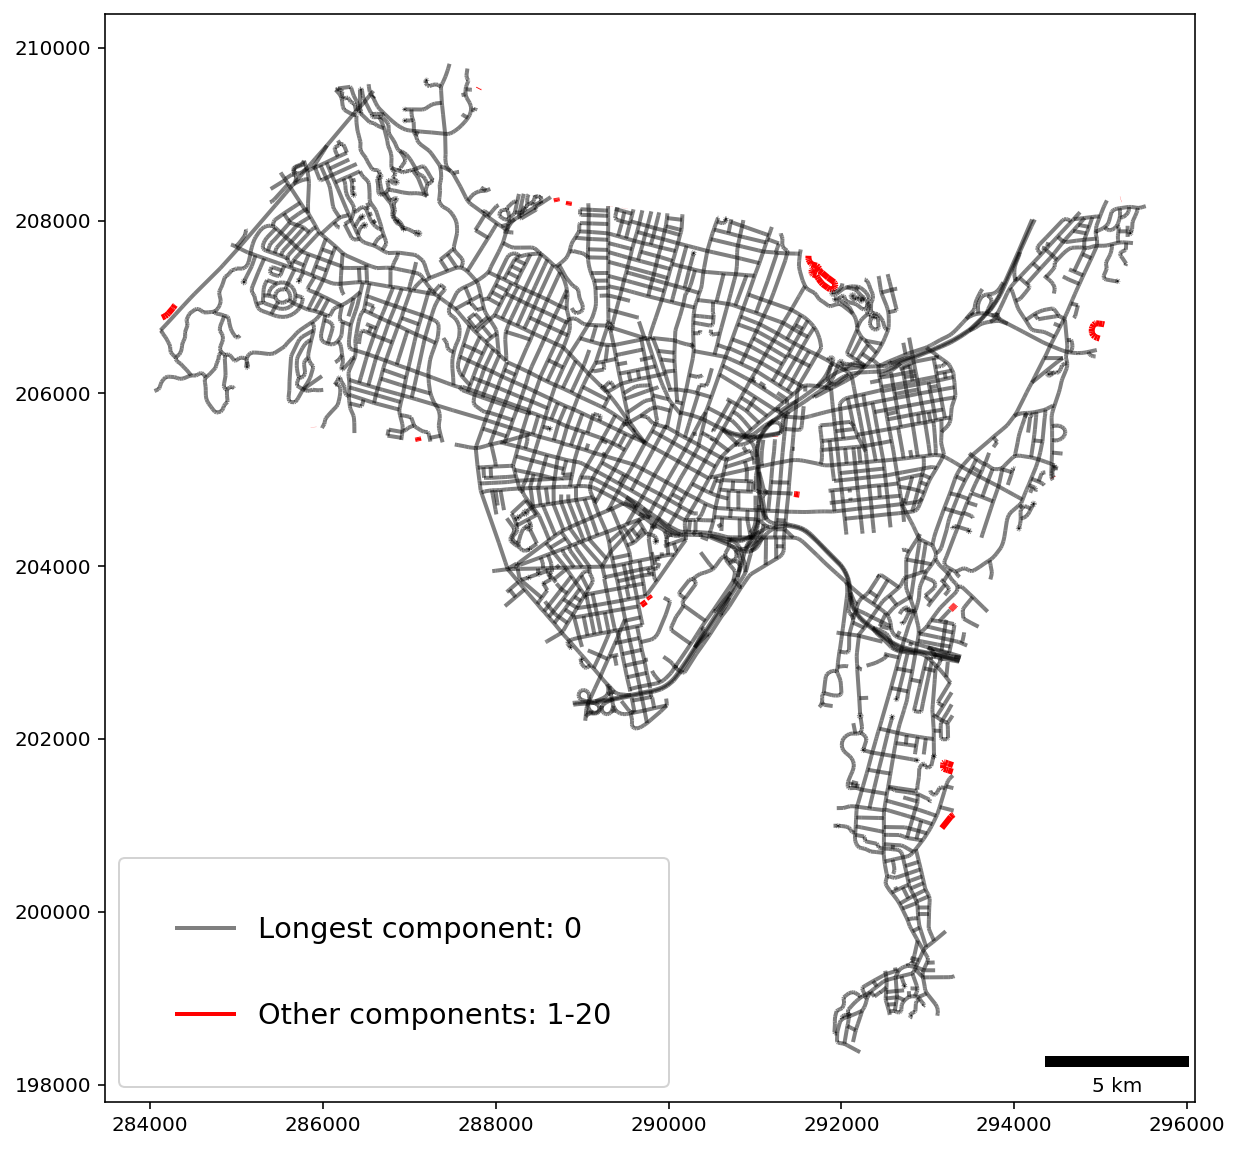

In [57]:
base = arcs_df.plot(color="r", alpha=1, linewidth=3, figsize=(10, 10))
lc_arcs.plot(ax=base, color="k", linewidth=2, alpha=0.5, zorder=2)
# add legend
legend(("longest", nlc, (ocomp[0], ocomp[-1])))
# add scale bar
scalebar = ScaleBar(3, units="m", location="lower right")
base.add_artist(scalebar);

---------------------------------------